# <center>Machine Learning Lab: Exercise Sheet 3</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

## Exercise 1: Data Preprocessing (5 Points) <br>

### Datasets: 

You are required to pre-process given datasets.
* Airfare and demand: http://www.stat.ufl.edu/winner/data/airq402.dat 
* Wine Quality: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
       

**Load the data using pandas**

In [40]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import math

np.seterr(all='raise')
path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex3'
os.chdir(path)

# Read Datasets
redwineDF = pd.read_csv('winequality-red.csv', sep = ';')
whitewineDF = pd.read_csv('winequality-white.csv', sep = ';')

redwineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
airDF = pd.read_csv('airq402.dat', header=None, names = ['Col1'])
# Remove multiple spaces from airline data
for index, row in airDF.iterrows():
    row['Col1'] = re.sub(' +', ' ', row['Col1'])

# Split data into columns
airDF = pd.DataFrame(airDF.Col1.str.split(' ').tolist(), 
                                   columns = ['City1','City2', 'Avg_Fare', 'Distance',   \
                                              'Avg_Wk_Pas', 'Top_Air', 'Mrkt_Share',  \
                                              'Avg_Fare2', 'Low_Air', 'Mrkt_Share2', 'Price'])   

airDF.head()

,City1,City2,Avg_Fare,Distance,Avg_Wk_Pas,Top_Air,Mrkt_Share,Avg_Fare2,Low_Air,Mrkt_Share2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


#### 1.1. Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use hashmap (dict) or pandas.get dummies]. Please explain your solution.

First, let us see how the original data looks:

In [42]:
redwineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


All the columns in Red & White wine datasets are in numeric form. Let's look at the airfare dataset:

In [43]:
airDF.describe()

,City1,City2,Avg_Fare,Distance,Avg_Wk_Pas,Top_Air,Mrkt_Share,Avg_Fare2,Low_Air,Mrkt_Share2,Price
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,90,85,980,771,921,16,928,972,19,918,970
top,ATL,TPA,165.91,1050,703.36,WN,100.0,68.86,WN,100.0,68.86
freq,64,46,4,5,3,257,4,3,230,4,3


These columns need to be converted to numeric format.

In [44]:
# Convert columns to numeric
airDF[['Avg_Fare', 'Distance','Avg_Wk_Pas', 
       'Mrkt_Share','Avg_Fare2', 'Mrkt_Share2', 
       'Price']] = airDF[['Avg_Fare', 'Distance','Avg_Wk_Pas', 
                          'Mrkt_Share','Avg_Fare2', 'Mrkt_Share2', 
                          'Price']].apply(pd.to_numeric)

airDF.describe()

,Avg_Fare,Distance,Avg_Wk_Pas,Mrkt_Share,Avg_Fare2,Mrkt_Share2,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


Also, let's change all categorical variables into binary using one-hot encoding technique. 

In [45]:
# Convert categorical to binary
airDF = pd.get_dummies(airDF)
airDF.describe()

,Avg_Fare,Distance,Avg_Wk_Pas,Mrkt_Share,Avg_Fare2,Mrkt_Share2,Price,City1_ABQ,City1_ACY,City1_ALB,...,Low_Air_G4,Low_Air_HP,Low_Air_NK,Low_Air_NW,Low_Air_SY,Low_Air_TZ,Low_Air_UA,Low_Air_US,Low_Air_WN,Low_Air_YX
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090,0.018000,0.004000,0.008000,...,0.001000,0.05800,0.016000,0.033000,0.007000,0.03400,0.055000,0.10100,0.230000,0.003000
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184,0.133018,0.063151,0.089129,...,0.031623,0.23386,0.125538,0.178726,0.083414,0.18132,0.228094,0.30148,0.421043,0.054717
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000


Now we have 217 features.

#### 1.2. If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.

In [46]:
# Remove rows with NA values

airDF = airDF.dropna()  
redwineDF = redwineDF.dropna()  
whitewineDF = whitewineDF.dropna()  

#### 1.3. Split the data into a train(80%) and test(20%) .

In [47]:
# Add bias column
airDF["bias"] = 1
redwineDF["bias"] = 1
whitewineDF["bias"] = 1

# Define function to divide data into test & train sets
def splitdf(df):
    train=df.sample(frac=0.8,random_state=200)
    test=df.drop(train.index)
    return train, test

In [48]:
airDF_train, airDF_test = splitdf(airDF)
redwine_train, redwine_test = splitdf(redwineDF)
whitewine_train, whitewine_test = splitdf(whitewineDF)
print("Airline Dataset    ----> Train Set:", len(airDF_train), "    Test Set: ", len(airDF_test))
print("Red Wine Dataset   ----> Train Set:", len(redwine_train), "   Test Set: ", len(redwine_test))
print("White Wine Dataset ----> Train Set:", len(whitewine_train), "   Test Set: ", len(whitewine_test))

Airline Dataset    ----> Train Set: 800     Test Set:  200
Red Wine Dataset   ----> Train Set: 1279    Test Set:  320
White Wine Dataset ----> Train Set: 3918    Test Set:  980


## Exercise 2: Linear Regression with Gradient Descent
### PART A: Implement Linear Regression with Gradient Descent (8 Points)
In this part you are required to implement linear regression algorithm with gradient descent algorithm. For each dataset given above:

#### 2.1 Minimize the loss function l(x, y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000.


Our algorithm will be as follows:

+ Initialize $β^{M}$ = [1, 1, ..... 1]
+ For each iteration:
    + Calculate $\hat{Y} = X.β$
    + $β_{new} = $β + 2.α.(y - $\hat{y}$).X                     (where α is learning rate)
    + Calculate new $\hat{Y}$
    + Calculate $\sum{|Y-\hat{Y}|}$
    + Calculate RMSE

In [91]:
# Define function to calculate y_hat
def predict(X, beta):
    return np.matmul(X, beta.T)

# Define linear regression function with GD
def learn_linreg(X, y, Xtest, ytest, iterations = 100, alpha = 0.1):
    X = np.matrix(X)
    y = np.matrix(y)
    ytest = np.matrix(ytest)
    
    # Initialize betas
    beta = np.matrix([1] * X.shape[1])
    RMSE, Resid = [], []
    
    ytest_hat_prev = predict(Xtest, beta).T    
    for iter in range(iterations):
        # Calculate y hat
        y_hat = predict(X, beta).T
        
        # Update betas
        df = - 2 * (y - y_hat) * X
        beta = beta - (alpha * df)

        # Calculate change in yhat & loss on test set
        try:
            ytest_hat = predict(Xtest, beta).T
            Err = np.sum(np.abs(ytest_hat_prev - ytest_hat), axis = 1)
            ytest_hat_prev = ytest_hat
            L = np.sqrt((np.sum(np.square(ytest - ytest_hat), axis = 1)) / len(ytest))        
            RMSE.append(L[0,0])
            Resid.append(Err[0,0])           
        except:
            print("Function diverged after iteration #", iter)
            break          

    return Resid, RMSE

#### 2.2 You can choose three suitable values of step length α > 0. For each value of step length perform the learning and record:
+ In each iteration of the minimize-GD algorithm calculate $|f(x_i−1) − f(x_i)|$ and at the end of learning. 
    + Plot it against iteration number i. 
    + Explain the graph.

+ In each iteration step also calculate RMSE on test set and at the end of learning. 
    + Plot it against iteration number i. 
    + Explain the graph.
    
    
**Create plotting function:**

In [92]:
def pred_plot(Residuals, RMSE, alpha):
    print()
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("RMSE Plots", fontsize=20)
    for a in range(len(alpha)):
        fig.add_subplot(1,3,a+1)
        plt.title("Learning Rate: {}".format(alpha[a]))
        plt.plot(RMSE[a])
        plt.xlabel("Iterations")
    plt.show()

    print()
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle("Change in Predicted y: |f(x−1) − f(x)|", fontsize=20)
    for a in range(len(alpha)):
        fig.add_subplot(1,3,a+1)
        plt.plot(Residuals[a],  color = 'Orange')
        plt.xlabel("Iterations")
        plt.title("Learning Rate: {}".format(alpha[a]))
    plt.show()

### Airline Dataset Regression

In [93]:
# Linear regression for airDF dataset
alpha = [10**-5, 10**-10, 10**-12]
X = airDF_train.loc[:, airDF_train.columns != 'Price']
y = airDF_train['Price']
Xtest = airDF_test.loc[:, airDF_test.columns != 'Price']
ytest = airDF_test['Price']

for a in range(len(alpha)):
    print("Airlines Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals, RMSE  = learn_linreg(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a])

#pred_plot(Residuals, RMSE, alpha)

Airlines Dataset Regression ----> Learning Rate =  1e-05
Function diverged after iteration # 33
Airlines Dataset Regression ----> Learning Rate =  1e-10
Airlines Dataset Regression ----> Learning Rate =  1e-12


We picked 3 learning rate:

+ $10^{-5}$ - The function diverged after $33^{rd}$ iteration probably because the learning rate was too high.
+ $10^{-10}$ - The function descended rapidly and  after ~$10^{th}$ iteration it had reached a local minima.
+ $10^{-12}$ - The learning rate was relatively small and hence the function was still descending constantly even during the $~200^{th}$ iteration.

For all three learning rates $|f(x_i−1) − f(x_i)|$ moves similar to the RMSE plot.

### Red Wine Dataset Regression

Red Wine Dataset Regression ----> Learning Rate =  1e-05
Function diverged after iteration # 76
Red Wine Dataset Regression ----> Learning Rate =  1e-07
Red Wine Dataset Regression ----> Learning Rate =  1e-10



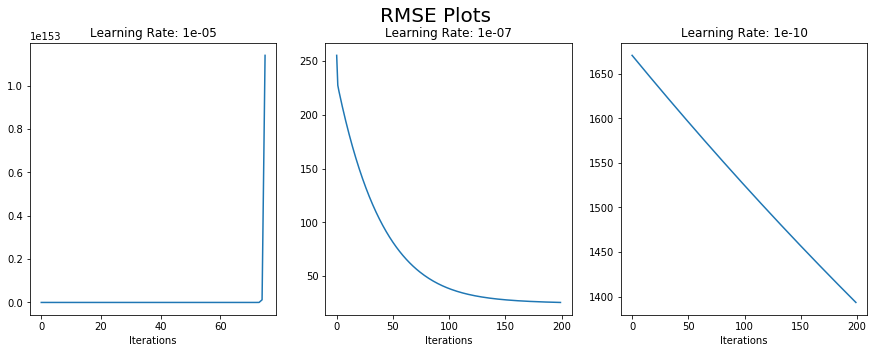

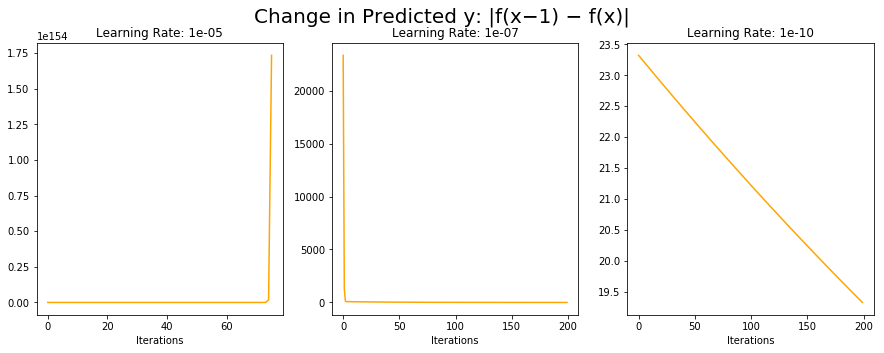

In [65]:
# Linear regression for Redwine dataset
alpha = [10**-5, 10**-7, 10**-10]
X = redwine_train.loc[:, redwine_train.columns != 'quality']
y = redwine_train['quality']
Xtest = redwine_test.loc[:, redwine_test.columns != 'quality']
ytest = redwine_test['quality']

for a in range(len(alpha)):
    print("Red Wine Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a])

pred_plot(Residuals, RMSE, alpha)

For the Red Wine dataset, we picked 3 different learning rate:

+ $10^{-5}$ - The function diverged after $76^{th}$ iteration because the learning rate was too high.
+ $10^{-7}$ - The function descended exponentially and  after ~$170^{th}$ iteration it had almost reached a local minima but was still descending. 
+ $10^{-10}$ - The learning rate was relatively small and hence the function was still descending constantly even during the $200^{th}$ iteration.

For first & third learning rates $|f(x_i−1) − f(x_i)|$ moves similar to the RMSE plot.
However, for the $~2^{nd}$ plot, the change in $\hat{y}$ is very slow after the first few iterations.


### White Wine Dataset Regression

White Wine Dataset Regression ----> Learning Rate =  1e-05
Function diverged after iteration # 46
White Wine Dataset Regression ----> Learning Rate =  1e-07
Function diverged after iteration # 123
White Wine Dataset Regression ----> Learning Rate =  1e-10



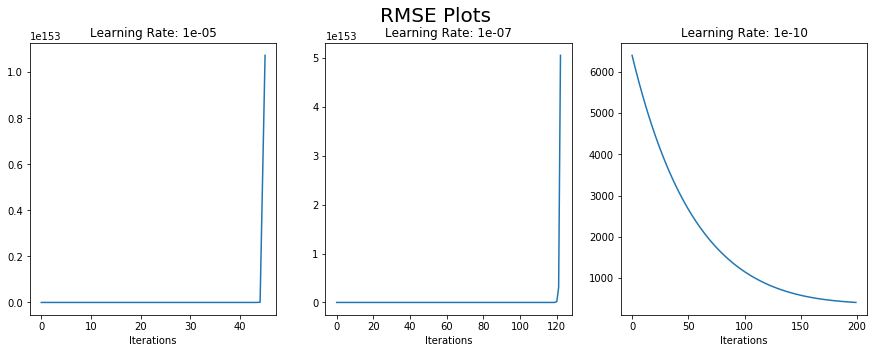

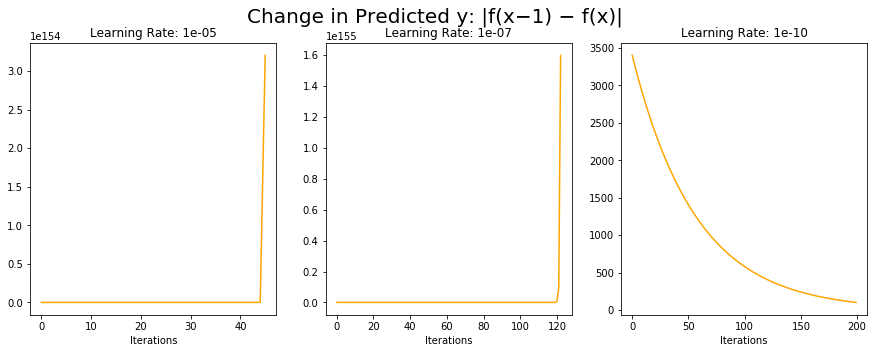

In [66]:
# Linear regression for Redwine dataset
alpha = [10**-5, 10**-7, 10**-10]
X = whitewine_train.loc[:, whitewine_train.columns != 'quality']
y = whitewine_train['quality']
Xtest = whitewine_test.loc[:, whitewine_test.columns != 'quality']
ytest = whitewine_test['quality']

for a in range(len(alpha)):
    print("White Wine Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a])

pred_plot(Residuals, RMSE, alpha)

For the White Wine dataset, we used the same 3 learning rates from the last dataset:

+ $10^{-5}$ - The function diverged after $46^{th}$ iteration because the learning rate was too high.
+ $10^{-7}$ - The function diverged after $123^{rd}$ iteration because the learning rate was too high.
+ $10^{-10}$ - The function descended exponentially and  after ~$170^{th}$ iteration it had almost reached a local minima but was still descending. 

For all three learning rates $|f(x_i−1) − f(x_i)|$ moves similar to the RMSE plot.



### PART B: Step Length for Gradient Descent (7 Points)
This task is based on Part A. You have to implement two algorithms $steplength−armijo$ and $steplength-bolddriver$ 

+ In each iteration of the minimize-GD algorithm calculate $|f(x_i−1) − f(x_i)|$ and at the end of learning. 
    + Plot it against iteration number i. 
    + Explain the graph.

+ In each iteration step also calculate RMSE on test set and at the end of learning. 
    + Plot it against iteration number i. 
    + Explain the graph.
    


### Implementing Armijo step-length update

In [67]:
# Armijo step-length update
def armijo_update(X, y, alpha, beta, gamma = 0.1): 
    y_hat = predict(X, beta).T
    dfx = - 2 * (y - y_hat) * X    
    fx = np.square(y - y_hat)
    left = np.sum(fx - np.square(y - (predict(X + alpha*dfx, beta).T)), axis = 1)
    right = alpha * gamma * dfx * dfx.T
    while left < right:
        alpha = alpha/2
        left = np.sum(fx - np.square(y - (predict(X- alpha*dfx, beta).T)), axis = 1)
        right = alpha * gamma * dfx * dfx.T
    return alpha

### Updating linear regression algorithm to include dynamic step-length updates

In [68]:
# Update learn_linreg function to include dynamic alpha
def learn_linreg2(X, y, Xtest, ytest, iterations = 100, alpha = 0.1, gamma = 0.1):
    X = np.matrix(X)
    y = np.matrix(y)
    ytest = np.matrix(ytest)
    
    # Initialize betas
    beta = np.matrix([1] * X.shape[1])
    RMSE, Resid = [], []
     
    ytest_hat_prev = predict(Xtest, beta).T    
    for iter in range(iterations):
        # Calculate y hat
        y_hat = predict(X, beta).T
        Err = predict(Xtest, beta).T    
        
        # Update learning rate using armijo
        alpha = armijo_update(X, y, alpha, beta, gamma)
        
        # Update betas
        dfx = - 2 * (y - y_hat) * X
        beta = beta - (alpha * dfx)
        
        # Calculate change in yhat & loss on test set
        try:
            ytest_hat = predict(Xtest, beta).T
            Err = np.sum(np.abs(ytest_hat_prev - ytest_hat), axis = 1)
            ytest_hat_prev = ytest_hat
            L = np.sqrt((np.sum(np.square(ytest - ytest_hat), axis = 1)) / len(ytest))        
            RMSE.append(L[0,0])
            Resid.append(Err[0,0])           
        except:
            print("Function diverged after iteration #", iter)
            break          
    plt.show()
    return Resid, RMSE

### Airline Dataset Regression with Armijo step-length update

Airlines Dataset Regression with Armijo ----> Initial Learning Rate =  1e-05
Airlines Dataset Regression with Armijo ----> Initial Learning Rate =  1e-10
Airlines Dataset Regression with Armijo ----> Initial Learning Rate =  1e-12



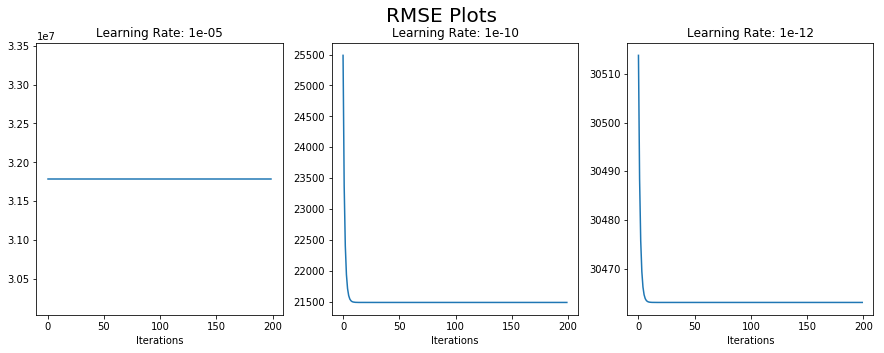

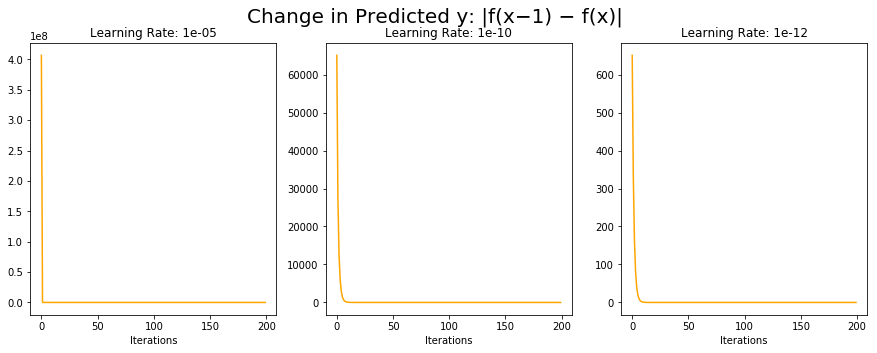

In [69]:
# Linear regression for airDF dataset
alpha = [10**-5, 10**-10, 10**-12]
X = airDF_train.loc[:, airDF_train.columns != 'Price']
y = airDF_train['Price']
Xtest = airDF_test.loc[:, airDF_test.columns != 'Price']
ytest = airDF_test['Price']

for a in range(len(alpha)):
    print("Airlines Dataset Regression with Armijo ----> Initial Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg2(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a], gamma = 0.0001)

pred_plot(Residuals, RMSE, alpha)

We set the **steepness as 0.0001** and used the same learning rates as last time.

+ $10^{-5}$ - The function doesn't descend because the learning rate becomes 0.
+ $10^{-7}$ - The function descended rapidly and  after ~$10^{th}$ iteration, RMSE had stopped decreasing.
+ $10^{-10}$ - The function descended rapidly and  after ~$10^{th}$ iteration, RMSE had stopped decreasing.

If we compare these charts to GD without armijo, the RMSE is still large after convergence. This means that our step-length reduced significantly very early on and probably optimized into a saddle point. 

Similar behaviour can be observed in the next two datasets where the RMSE is quite large even after convergence.

### Red Wine Dataset Regression with Armijo step-length update

Red Wine Dataset Regression ----> Learning Rate =  1e-05
Red Wine Dataset Regression ----> Learning Rate =  1e-07
Red Wine Dataset Regression ----> Learning Rate =  1e-10



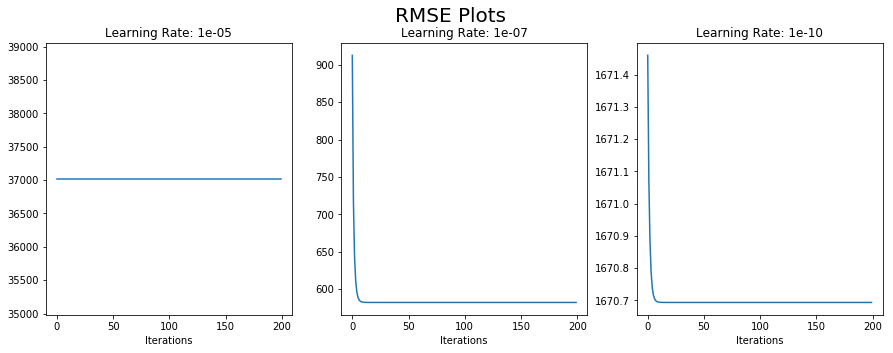

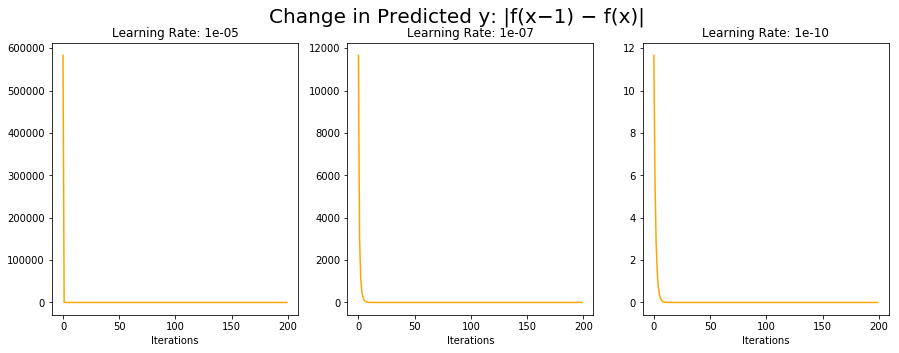

In [70]:
# Linear regression for Redwine dataset
alpha = [10**-5, 10**-7, 10**-10]
X = redwine_train.loc[:, redwine_train.columns != 'quality']
y = redwine_train['quality']
Xtest = redwine_test.loc[:, redwine_test.columns != 'quality']
ytest = redwine_test['quality']

for a in range(len(alpha)):
    print("Red Wine Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg2(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a], gamma = 0.01)

pred_plot(Residuals, RMSE, alpha)

### White Wine Dataset Regression with Armijo step-length update

White Wine Dataset Regression ----> Learning Rate =  1e-05
White Wine Dataset Regression ----> Learning Rate =  1e-07
White Wine Dataset Regression ----> Learning Rate =  1e-10



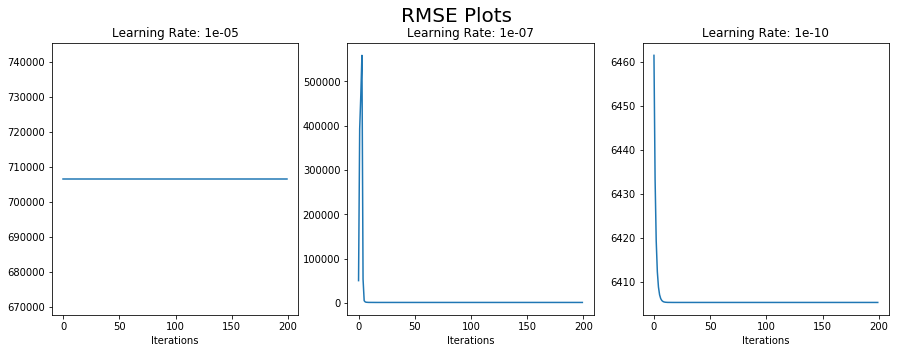

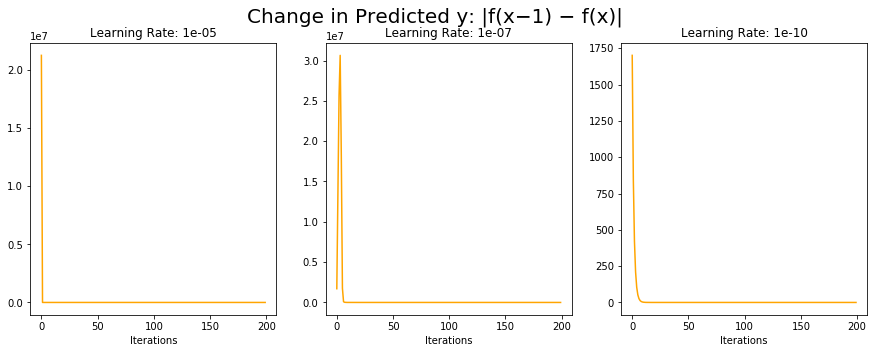

In [71]:
# Linear regression for Redwine dataset
alpha = [10**-5, 10**-7, 10**-10]
X = whitewine_train.loc[:, whitewine_train.columns != 'quality']
y = whitewine_train['quality']
Xtest = whitewine_test.loc[:, whitewine_test.columns != 'quality']
ytest = whitewine_test['quality']

for a in range(len(alpha)):
    print("White Wine Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg2(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a], gamma = 0.001)

pred_plot(Residuals, RMSE, alpha)

### Implementing bolddriver step-length update

In [94]:
# Bold-driver step-length update
def bolddriver_update(X, y, alpha, beta, inc = 1.1, dec = 0.1): 
    y_hat = predict(X, beta).T
    dfx = - 2 * (y - y_hat) * X    
    fx = np.square(y - y_hat)
    fx_ad = np.square(y - (predict(X + alpha*dfx, beta).T))
    cond = np.sum(fx - fx_ad, axis = 1).item(0)
    
    alpha = alpha * inc
    while  cond <= -0.01:
        alpha = alpha * dec
        fx_ad = np.square(y - (predict(X + alpha*dfx, beta).T))
        cond = np.sum(fx - fx_ad, axis = 1).item(0)
    return alpha

### Updating linear regression algorithm to include dynamic step-length updates

In [88]:
# Update learn_linreg function to include dynamic alpha
def learn_linreg3(X, y, Xtest, ytest, iterations = 100, alpha = 0.1, inc = 1.1, dec = 0.5):
    X = np.matrix(X)
    y = np.matrix(y)
    ytest = np.matrix(ytest)
    
    # Initialize betas
    beta = np.matrix([1] * X.shape[1])
    RMSE, Resid = [], []
     
    for iter in range(iterations):
        # Calculate y hat
        y_hat = predict(X, beta).T
        Err = predict(Xtest, beta).T    
        
        # Update learning rate using armijo
        alpha = bolddriver_update(X, y, alpha, beta, inc, dec)
        
        # Update betas
        dfx = - 2 * (y - y_hat) * X
        beta = beta - (alpha * dfx)
        
        # Calculate change in yhat & loss on test set
        try:
            ytest_hat = predict(Xtest, beta).T
            Err = np.sum(np.abs(Err - ytest_hat), axis = 1)
            L = np.sqrt((np.sum(np.square(ytest - ytest_hat), axis = 1)) / len(ytest))        
            RMSE.append(L[0,0])
            Resid.append(Err[0,0])           
        except:
            print("Function diverged after iteration #", iter)
            break          
    return Resid, RMSE

### Airline Dataset Regression with Bolddriver step-length update

Airlines Dataset Regression with Bold-driver ----> Initial Learning Rate =  1e-05
Airlines Dataset Regression with Bold-driver ----> Initial Learning Rate =  1e-10
Airlines Dataset Regression with Bold-driver ----> Initial Learning Rate =  1e-12



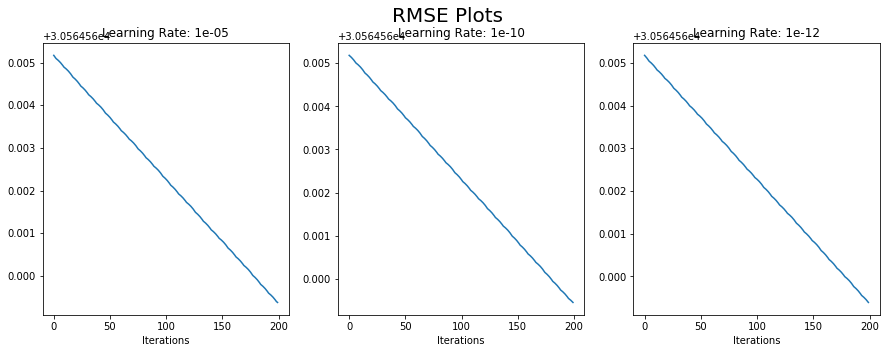

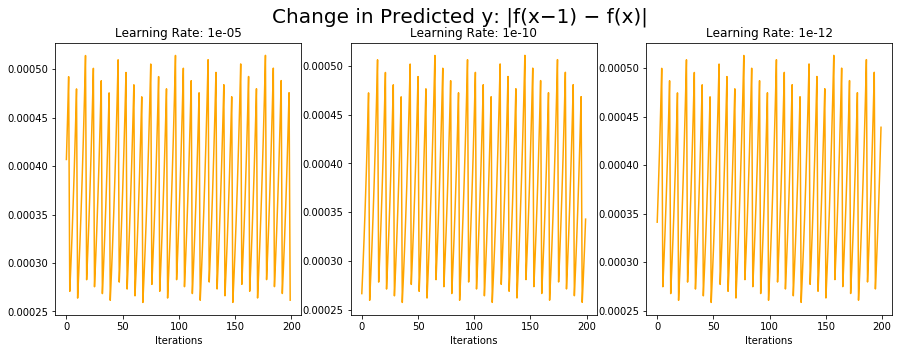

In [90]:
# Linear regression for airDF dataset
alpha = [10**-5, 10**-10, 10**-12]

# Linear regression for airDF dataset
alpha = [10**-5, 10**-10, 10**-12]
X = airDF_train.loc[:, airDF_train.columns != 'Price']
y = airDF_train['Price']
Xtest = airDF_test.loc[:, airDF_test.columns != 'Price']
ytest = airDF_test['Price']

for a in range(len(alpha)):
    print("Airlines Dataset Regression with Bold-driver ----> Initial Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg3(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a], inc = 1.1, dec = 0.5)

pred_plot(Residuals, RMSE, alpha)

For all three learning rates, bold-driver descends in a similar fashion. The gradient oscillates between high and small values but the error is still consistently reduced. However, there is a periodicity present in the descent along with the trendline. 

As we can see, bold-driver increments step-length and takes a few steps **(In our case, a = 1.1a)** to reduce error but as soon as the $\delta{f}$ threshold is crossed, bold-driver sharply decrements **(In our case, a = 0.2a)** the alpha again and starts over.

Intuitively, the smoothness of the graph should depend on the ratio of $a^+$ & $a^-$.

We will test this on the redwine dataset by keeping the ratio equal.

### Red Wine Dataset Regression with Armijo step-length update

Red Wine Dataset Regression ----> Learning Rate =  1e-05
Red Wine Dataset Regression ----> Learning Rate =  1e-07
Red Wine Dataset Regression ----> Learning Rate =  1e-10



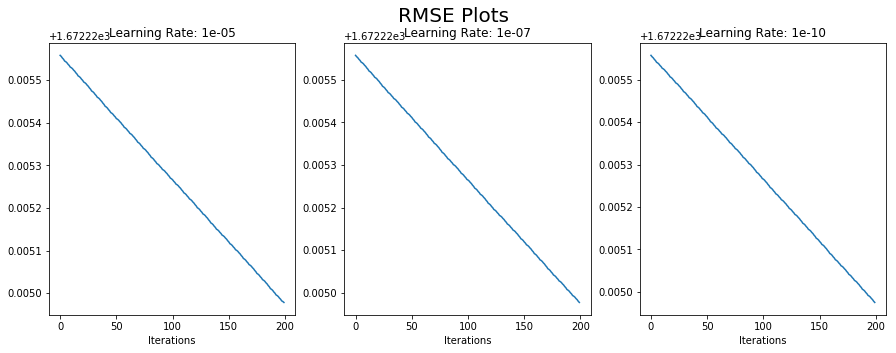

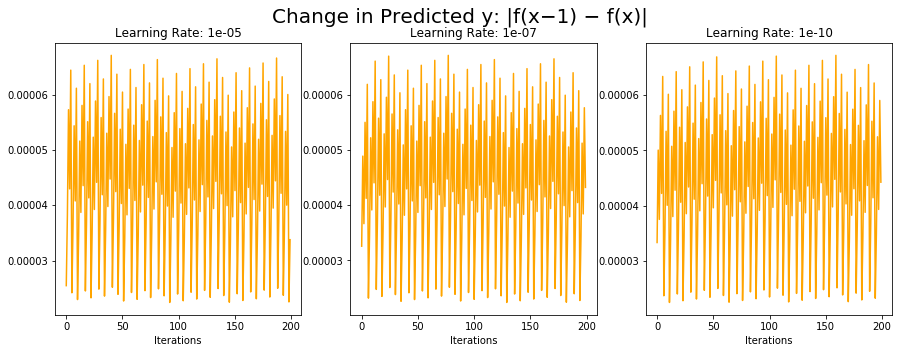

In [80]:
# Linear regression for Redwine dataset
alpha = [10**-5, 10**-7, 10**-10]
X = redwine_train.loc[:, redwine_train.columns != 'quality']
y = redwine_train['quality']
Xtest = redwine_test.loc[:, redwine_test.columns != 'quality']
ytest = redwine_test['quality']

for a in range(len(alpha)):
    print("Red Wine Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg3(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a], inc = 1.5, dec = 0.5)

pred_plot(Residuals, RMSE, alpha)

The hypothesis holds true. The decrement is linear. The gradient of $\hat{y}$ is also oscillating about X-axis.

But the RMSE optimization is still not exponential. Let's try to boost the $a^+$ & $a^-$ ratio more in the +ve direction.

### White Wine Dataset Regression with Armijo step-length update

White Wine Dataset Regression ----> Learning Rate =  1e-05
White Wine Dataset Regression ----> Learning Rate =  1e-07
White Wine Dataset Regression ----> Learning Rate =  1e-10



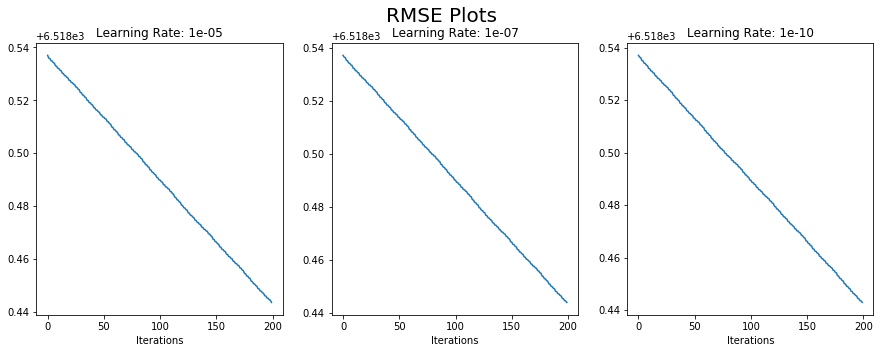

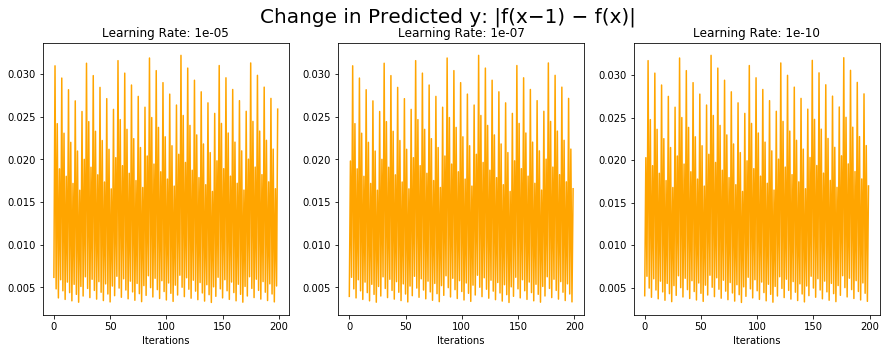

In [76]:
# Linear regression for Redwine dataset
alpha = [10**-5, 10**-7, 10**-10]
X = whitewine_train.loc[:, whitewine_train.columns != 'quality']
y = whitewine_train['quality']
Xtest = whitewine_test.loc[:, whitewine_test.columns != 'quality']
ytest = whitewine_test['quality']

for a in range(len(alpha)):
    print("White Wine Dataset Regression ----> Learning Rate = ", alpha[a])
    Residuals[a], RMSE[a]  = learn_linreg3(X, y, Xtest, ytest, iterations = 200, alpha = alpha[a], inc = 5, dec = 0.5)

pred_plot(Residuals, RMSE, alpha)

Again, we see that bold-driver seems to only have a linear descent. This is not entirely good. However, the first few iterations of bold-driver can significantly affect final results. As we can see, the results are similar irrespective of the initial learning rates.